# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [ ]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
print(f'Does the income dataframe have any missing values: {df_hh_income.isna().values.any()} \n How many missing values?: {df_hh_income.isna().values.sum()}')
print(f'Does the poverty dataframe have any missing values: {df_pct_poverty.isna().values.any()} \n How many missing values?: {df_pct_poverty.isna().values.sum()}')
print(f'Does the hs completion dataframe have any missing values: {df_pct_completed_hs.isna().values.any()} \n How many missing values?: {df_pct_completed_hs.isna().values.sum()}')
print(f'Does the demographics dataframe have any missing values: {df_share_race_city.isna().values.any()} \n How many missing values?: {df_share_race_city.isna().values.sum()}')
print(f'Does the fatalities dataframe have any missing values: {df_fatalities.isna().values.any()} \n How many missing values?: {df_fatalities.isna().values.sum()}')

Does the income dataframe have any missing values: True 
 How many missing values?: 51
Does the poverty dataframe have any missing values: False 
 How many missing values?: 0
Does the hs completion dataframe have any missing values: False 
 How many missing values?: 0
Does the demographics dataframe have any missing values: False 
 How many missing values?: 0
Does the fatalities dataframe have any missing values: True 
 How many missing values?: 346


In [ ]:
print(f'Does the income dataframe have any duplicates: {df_hh_income.duplicated().values.any()} \n How many?: {df_hh_income.duplicated().values.sum()}')
print(f'Does the poverty dataframe have any duplicates: {df_pct_poverty.duplicated().values.any()} \n How many?: {df_pct_poverty.duplicated().values.sum()}')
print(f'Does the hs completion dataframe have any duplicates: {df_pct_completed_hs.duplicated().values.any()} \n How many?: {df_pct_completed_hs.duplicated().values.sum()}')
print(f'Does the demographics dataframe have any duplicates: {df_share_race_city.duplicated().values.any()} \n How many?: {df_share_race_city.duplicated().values.sum()}')
print(f'Does the fatalities dataframe have any duplicates: {df_fatalities.duplicated().values.any()} \n How many?: {df_fatalities.duplicated().values.sum()}')

Does the income dataframe have any duplicates: False 
 How many?: 0
Does the poverty dataframe have any duplicates: False 
 How many?: 0
Does the hs completion dataframe have any duplicates: False 
 How many?: 0
Does the demographics dataframe have any duplicates: False 
 How many?: 0
Does the fatalities dataframe have any duplicates: False 
 How many?: 0


In [ ]:
df_hh_income.isnull().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [ ]:
df_hh_income.isnull().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [ ]:
df_fatalities.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [ ]:
df_fatalities.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

##Cleaning dataframes


In [ ]:
df_hh_income.columns = df_hh_income.columns.str.replace(' ', '_')

In [ ]:
df_pct_poverty.columns = df_pct_poverty.columns.str.replace(' ', '_')

In [ ]:
df_pct_completed_hs.columns = df_pct_completed_hs.columns.str.replace(' ', '_')

In [ ]:
df_share_race_city.columns = df_share_race_city.columns.str.replace(' ', '_')

In [ ]:
clean_income = df_hh_income
clean_income['Median_Income'] = df_hh_income['Median_Income'].fillna(0)

In [ ]:
clean_income.isnull().any()

Geographic_Area    False
City               False
Median_Income      False
dtype: bool

In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic_Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
clean_poverty = df_pct_poverty

In [ ]:
display(clean_poverty.iloc[573])

Geographic_Area             AL
City               Whatley CDP
poverty_rate                 -
Name: 573, dtype: object

In [ ]:
clean_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)

In [ ]:
clean_poverty.poverty_rate = pd.to_numeric(clean_poverty.poverty_rate)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
state_poverty_rate = clean_poverty.groupby('Geographic_Area', as_index=False)['poverty_rate'].mean()
state_poverty_rate = state_poverty_rate.sort_values(by='poverty_rate', ascending=False)

In [ ]:
fig1 = px.bar(state_poverty_rate, x='Geographic_Area', y='poverty_rate')
fig1.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
clean_hs = df_pct_completed_hs

In [ ]:
display(clean_hs.iloc[573])

Geographic_Area                  AL
City                    Whatley CDP
percent_completed_hs              -
Name: 573, dtype: object

In [ ]:
clean_hs.percent_completed_hs.replace('-', np.nan, regex=True, inplace=True)

In [ ]:
clean_hs.percent_completed_hs = pd.to_numeric(clean_hs.percent_completed_hs)

In [ ]:
state_grad_rate = clean_hs.groupby('Geographic_Area', as_index=False)['percent_completed_hs'].mean()
state_grad_rate = state_grad_rate.sort_values(by='percent_completed_hs', ascending=False)

In [ ]:
fig2 = px.bar(state_grad_rate, x='Geographic_Area', y='percent_completed_hs', range_y=(70,100))
fig2.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
state_grad_rate = state_grad_rate.sort_values('Geographic_Area', ascending=True)
state_poverty_rate = state_poverty_rate.sort_values('Geographic_Area', ascending=True)

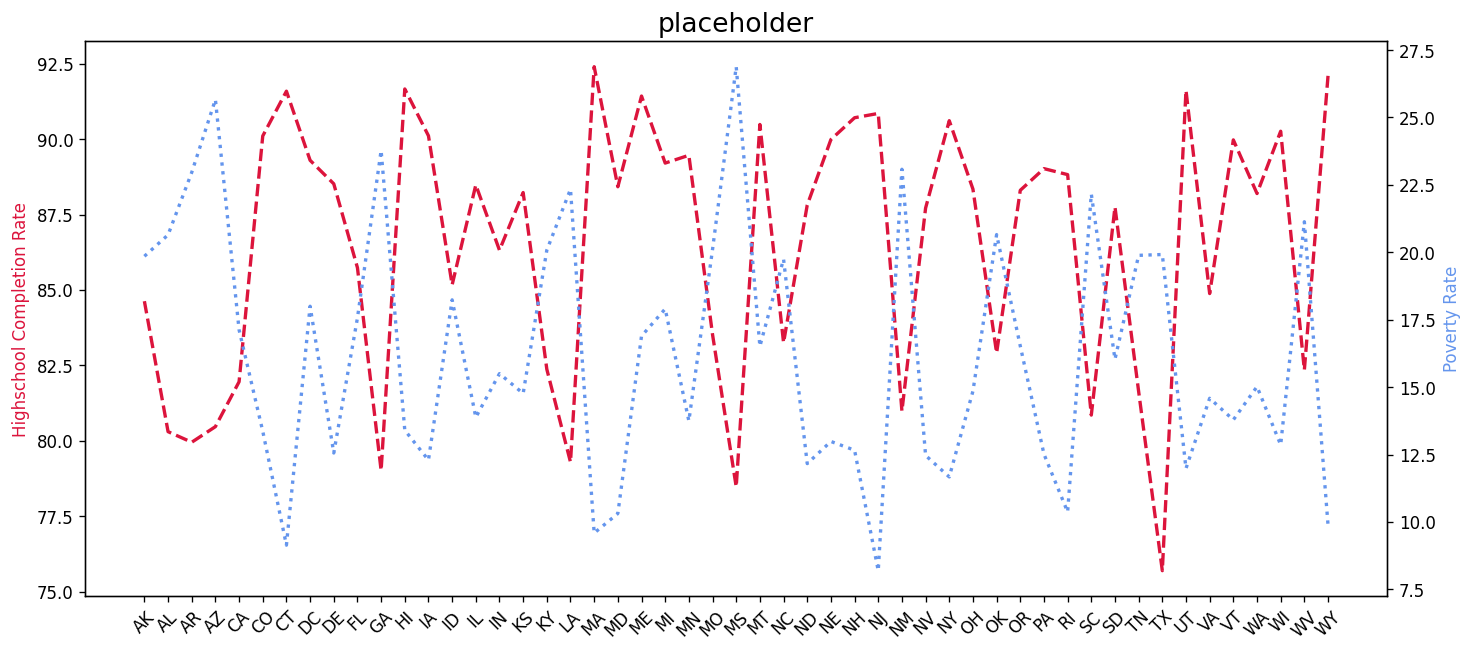

In [ ]:
plt.figure(figsize=(14,6), dpi=120)
plt.title('placeholder', fontsize=16)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(state_grad_rate.Geographic_Area,
        state_grad_rate.percent_completed_hs,
        c='crimson',
        linewidth=2,
        linestyle='dashed')

ax2.plot(state_poverty_rate.Geographic_Area,
        state_poverty_rate.poverty_rate,
        c='cornflowerblue',
        linewidth=2,
        linestyle='dotted')

ax1.set_ylabel('Highschool Completion Rate', color='crimson')
ax2.set_ylabel('Poverty Rate', color='cornflowerblue')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
grad_poverty = state_grad_rate
grad_poverty = grad_poverty.merge(state_poverty_rate, on='Geographic_Area', how='inner')

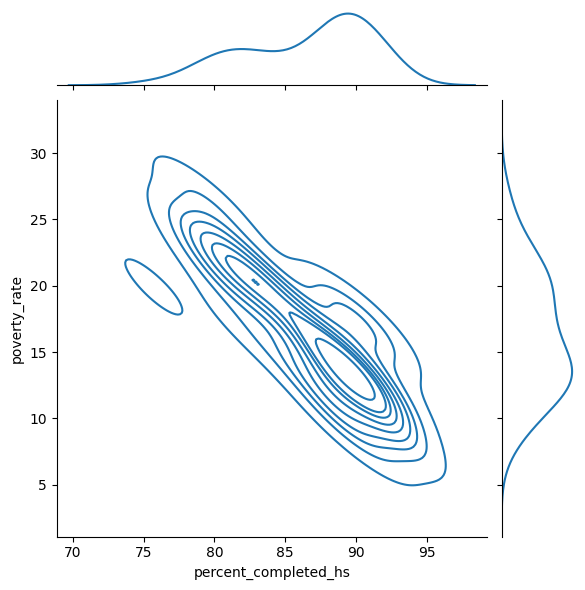

In [ ]:
fig3 = sns.jointplot(grad_poverty, x='percent_completed_hs', y='poverty_rate', kind='kde')

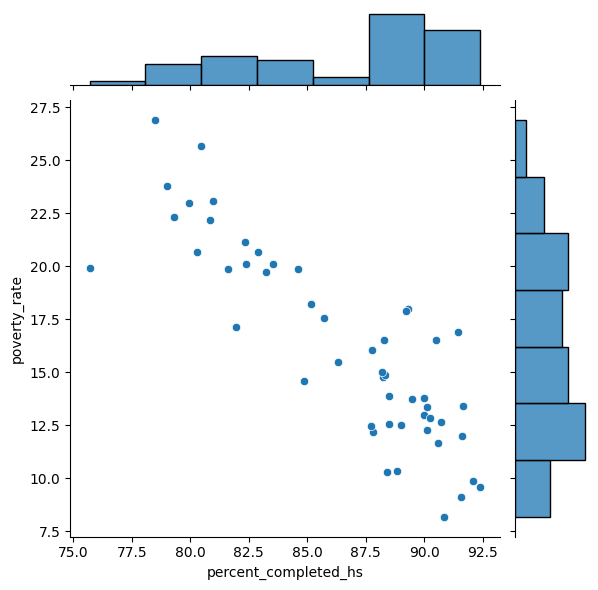

In [ ]:
fig4 = sns.jointplot(grad_poverty, x='percent_completed_hs', y='poverty_rate', kind='scatter')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

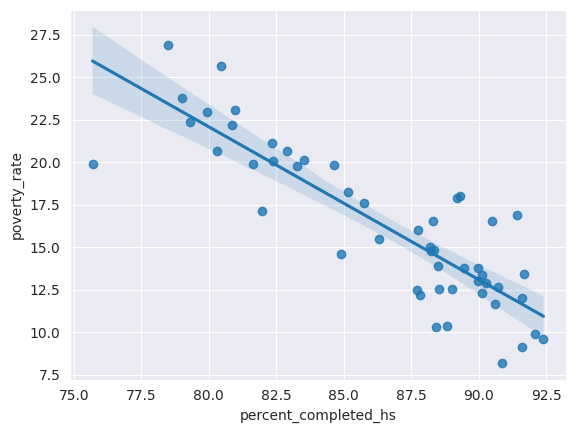

In [ ]:
with sns.axes_style('darkgrid'):
  fig5 = sns.regplot(data=grad_poverty, x='percent_completed_hs', y='poverty_rate')

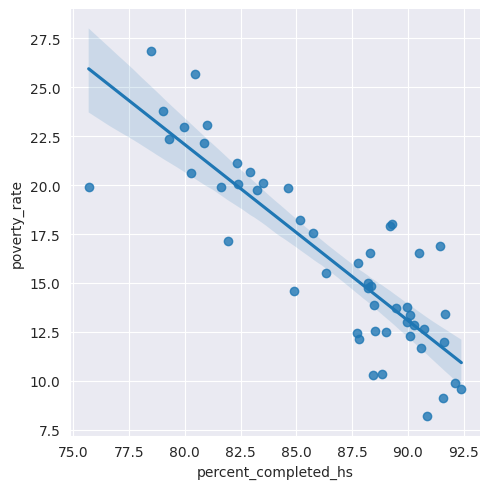

In [ ]:
with sns.axes_style('darkgrid'):
  fig6 = sns.lmplot(data=grad_poverty, x='percent_completed_hs', y='poverty_rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic_area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
clean_race = df_share_race_city

In [ ]:
clean_race.share_white.replace('X', np.nan, regex=True, inplace=True)
clean_race.share_asian.replace('X', np.nan, regex=True, inplace=True)
clean_race.share_black.replace('X', np.nan, regex=True, inplace=True)
clean_race.share_hispanic.replace('X', np.nan, regex=True, inplace=True)
clean_race.share_native_american.replace('X', np.nan, regex=True, inplace=True)
0
clean_race.share_white = pd.to_numeric(clean_race.share_white)
clean_race.share_asian = pd.to_numeric(clean_race.share_asian)
clean_race.share_black = pd.to_numeric(clean_race.share_black)
clean_race.share_hispanic = pd.to_numeric(clean_race.share_hispanic)
clean_race.share_native_american = pd.to_numeric(clean_race.share_native_american)

In [ ]:
state_race = clean_race.groupby('Geographic_area').agg({'share_white': 'mean', 'share_asian': 'mean', 'share_black': 'mean', 'share_hispanic': 'mean', 'share_native_american': 'mean'})
state_race.head()

,share_white,share_asian,share_black,share_hispanic,share_native_american
Geographic_area,,,,,
AK,45.65,1.39,0.57,2.15,45.86
AL,72.51,0.48,23.32,2.98,0.66
AR,78.45,0.48,16.30,4.27,0.76
AZ,59.93,0.73,0.95,20.14,28.59
CA,71.87,5.57,2.69,29.65,1.72


In [ ]:
fig7 = px.bar(state_race, x=state_race.index, y=['share_white', 'share_asian', 'share_black', 'share_hispanic', 'share_native_american'])
fig7.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
fatal_race = df_fatalities.race.value_counts()
fatal_race.isnull().any()

False

In [ ]:
labels = {1:'White', 2:'Black', 3:'Hispanic', 4:'Asian', 5:'Native American', 6:'Other'}
fig8 = px.pie(labels=fatal_race.index,
             values=fatal_race.values,
             title="Fatalities by Race",
             names=labels,
             hole=0.4,)

fig8.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig8.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
fatal_gender = df_fatalities.gender.value_counts()

In [ ]:
labels = {1:'Male', 2:'Female'}
fig9 = px.pie(labels=fatal_gender.index,
             values=fatal_gender.values,
             title="Fatalities by gender",
             names=labels)

fig9.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig9.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
fatal_gender2 = df_fatalities
fatal_gender2.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [ ]:
fatal_gender2.armed.replace(np.nan, regex=True, inplace=True)
fatal_gender2.age.replace(np.nan, regex=True, inplace=True)
fatal_gender2.race.replace(np.nan, regex=True, inplace=True)
fatal_gender2.flee.replace(np.nan, regex=True, inplace=True)
fatal_gender2.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

In [ ]:
age_manner = fatal_gender2[['age', 'manner_of_death', 'gender']]

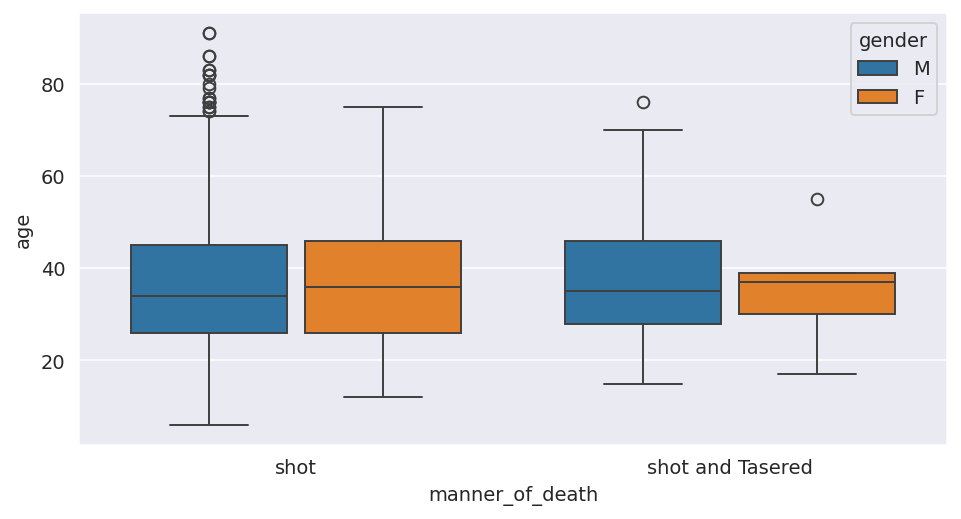

In [ ]:
plt.figure(figsize=(8,4), dpi=140)
with sns.axes_style('darkgrid'):
  fig10 = sns.boxplot(data=age_manner,
                      x='manner_of_death',
                      y='age',
                      hue='gender',
                      gap=.1)

plt.show()


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
fatal_armed = fatal_gender2
fatal_armed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
armed_list = fatal_armed['armed'].tolist()
print(armed_list)

['gun', 'gun', 'unarmed', 'toy weapon', 'nail gun', 'gun', 'gun', 'gun', 'unarmed', 'toy weapon', 'knife', 'gun', 'knife', 'gun', 'gun', 'vehicle', 'shovel', 'unarmed', 'gun', 'gun', 'gun', 'gun', 'gun', 'gun', 'gun', 'knife', 'vehicle', 'vehicle', 'gun', 'knife', 'gun', 'knife', 'gun', 'gun', 'gun', 'knife', 'gun', 'gun', 'knife', 'gun', 'gun', 'knife', 'gun', 'gun', 'knife', 'vehicle', 'gun', 'gun', 'gun', 'gun', 'toy weapon', 'knife', 'gun', 'vehicle', 'knife', 'gun', 'gun', 'knife', 'gun', 'gun', 'vehicle', 'gun', 'unarmed', 'knife', 'vehicle', 'gun', 'gun', 'knife', 'gun', 'hammer', 'gun', 'unarmed', 'gun', 'gun', 'gun', 'knife', 'gun', 'unarmed', 'gun', 'gun', 'gun', 'knife', 'gun', 'unarmed', 'gun', 'gun', 'unarmed', 'gun', 'knife', 'gun', 'gun', 'toy weapon', 'gun', 'gun', 'gun', 'gun', 'gun', 'gun', 'gun', 'gun', 'unarmed', 'gun', 'gun', 'knife', 'toy weapon', 'vehicle', 'gun', 'unarmed', 'gun', 'knife', 'gun', 'gun', 'unarmed', 'gun', 'hatchet', 'gun', 'gun', 'toy weapon', 'g

In [ ]:
fatal_armed = fatal_armed.armed.value_counts()

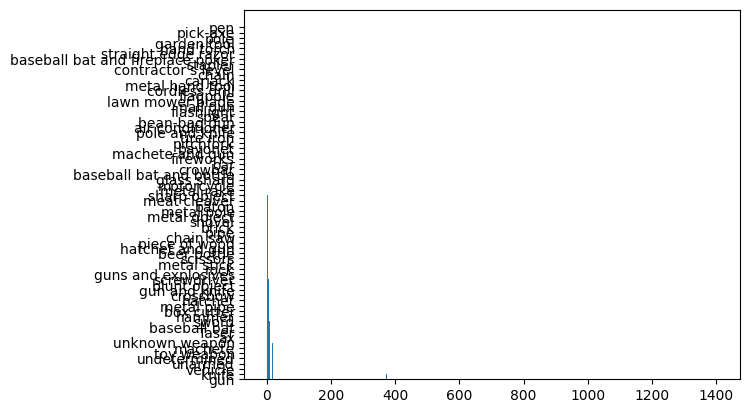

In [ ]:
fig11 = plt.bar(fatal_armed, fatal_armed.index,)

In [ ]:
fig11 = px.bar(
        x = fatal_armed.index,
        y = fatal_armed.values,
        color = fatal_armed.values,
        color_continuous_scale='jet',
        title='Fatalities by Armed Status')

fig11.update_xaxes(tickangle=45,
                   categoryorder='total descending')

fig11.update_layout(xaxis_title='Armed Status',
                    yaxis_title='Total Fatalities')

fig11.show()

In [ ]:
fatal_armed2 = fatal_gender2
fatal_armed2.loc[(fatal_armed2.armed != 'unarmed') & (fatal_armed2.armed != 'undetermined'), 'armed'] = 'armed'
fatal_armed2 = fatal_armed2.armed.value_counts()

In [ ]:
fig12 = px.pie(labels=fatal_armed2.index,
              values=fatal_armed2.values,
              title="Fatalities by Armed Status",
              names=fatal_armed2.index)

fig12.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities.info()
df_fatalities.isna().any()
df_fatalities.age.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

count   2,535.00
mean       36.66
std        13.08
min         6.00
25%        26.00
50%        34.00
75%        45.00
max        91.00
Name: age, dtype: float64

In [ ]:
fatal_age_25 = df_fatalities.loc[df_fatalities.age <= 25, 'age'].count()
killed_under_25 = (fatal_age_25 / 2535) * 100
print(f'Of the people killed in officer involved shootings, {killed_under_25:.2f}% where under the age of 25.')

Of the people killed in officer involved shootings, 22.56% where under the age of 25.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

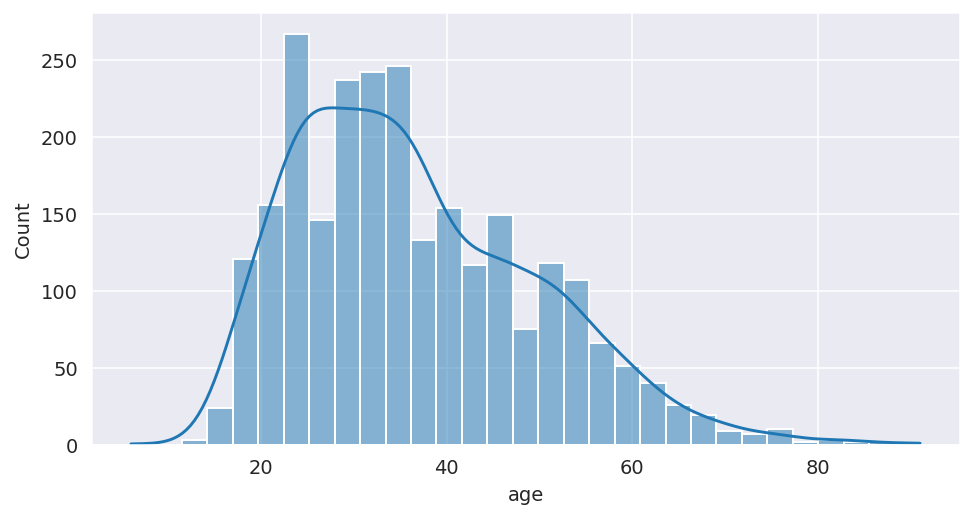

In [ ]:
plt.figure(figsize=(8,4), dpi=140)
with sns.axes_style('darkgrid'):
  fig12 = sns.histplot(data=df_fatalities,
                      x='age',
                      kde=True)

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

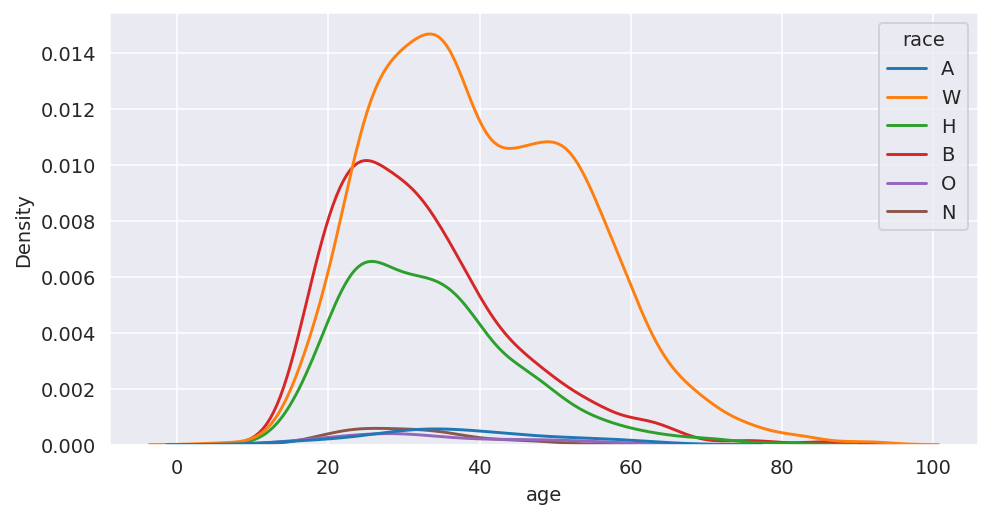

In [ ]:
plt.figure(figsize=(8,4), dpi=140)
with sns.axes_style('darkgrid'):
  fig13 = sns.kdeplot(data=df_fatalities,
                      x='age',
                      hue='race')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

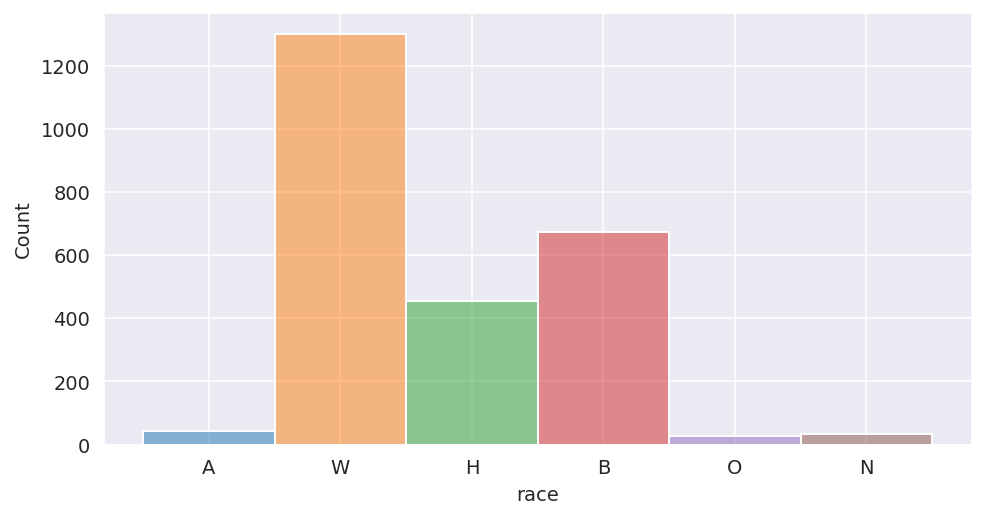

In [ ]:
plt.figure(figsize=(8,4), dpi=140)
with sns.axes_style('darkgrid'):
  fig14 = sns.histplot(data=df_fatalities,
                      x='race',
                      hue='race',
                      legend=False)

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental_illness = df_fatalities.signs_of_mental_illness.value_counts()

In [ ]:
fig15 = px.pie(labels=mental_illness.index,
              values=mental_illness.values,
              title="Percent of fatalities with history of mental illness",
              names=mental_illness.index)

fig15.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
fatal_cities = df_fatalities.groupby('city').size()
fatal_cities = fatal_cities.sort_values(ascending=False)[:10]
fatal_cities.head(10)

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Miami          18
Austin         18
St. Louis      15
dtype: int64

In [ ]:
fig16 = px.bar(
    x = fatal_cities.index,
    y = fatal_cities.values,
    title='Top 10 Cities by Number of Fatal Police Shootings')

fig16.update_layout(xaxis_title='City',
                    yaxis_title='Total Fatalities')

fig16.show()

In [ ]:
fatal_cities_state = df_fatalities.groupby(['city', 'state']).size()
fatal_cities_state = fatal_cities_state.sort_values(ascending=False)
fatal_cities_state.head()

city         state
Los Angeles  CA       39
Phoenix      AZ       31
Houston      TX       26
Chicago      IL       25
Las Vegas    NV       21
dtype: int64

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
df_fatal_cities_state = fatal_cities_state
df_fatal_cities_state = pd.DataFrame(data=df_fatal_cities_state).reset_index()

In [ ]:
df_fatal_cities_state['city'] = df_fatal_cities_state['city'] + ' city'

In [ ]:
df_share_race_city.loc[df_share_race_city['City'] == 'Houston city']

,Geographic_area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
712,AK,Houston city,82.20,0.40,6.70,0.60,3.30
12752,MN,Houston city,99.50,0.00,0.40,0.00,0.10
13416,MS,Houston city,51.00,41.40,0.10,0.70,7.20
14076,MO,Houston city,96.30,0.20,0.60,0.40,1.20
25157,TX,Houston city,50.50,23.70,0.70,6.00,43.80


In [ ]:
fatal_city_merged = pd.merge(df_fatal_cities_state, clean_race, left_on=['city', 'state'], right_on=['City', 'Geographic_area'], how='outer')
fatal_city_merged.head()

,city,state,0,Geographic_area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Los Angeles city,CA,39.00,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
1,Phoenix city,AZ,31.00,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
2,Houston city,TX,26.00,TX,Houston city,50.50,23.70,0.70,6.00,43.80
3,Chicago city,IL,25.00,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
4,Las Vegas city,NV,21.00,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50


In [ ]:
fatal_city_merged_top = fatal_city_merged[:10]

<Figure size 1680x840 with 0 Axes>

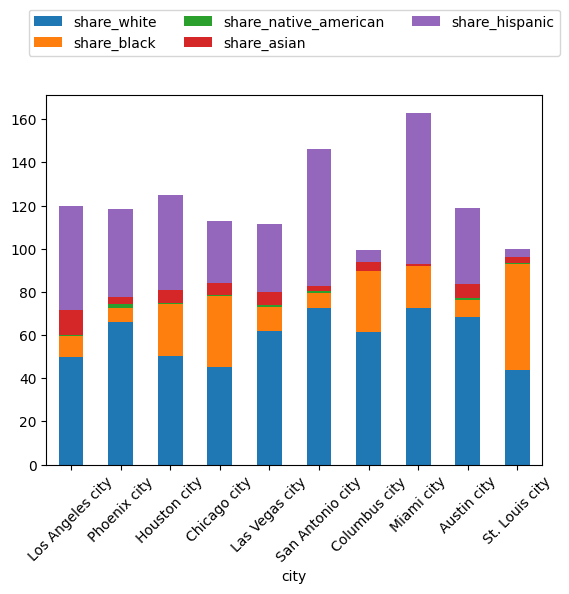

In [ ]:
plt.figure(figsize=(12,6), dpi=140)
fig17 = fatal_city_merged_top.plot(x='city',
                              y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'],
                              rot=45,
                              kind='bar',
                              stacked=True)

fig17.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.25), fancybox=True)

The most likely explanation for the racial demographic percentages equalling to more that 100% is that the original dataset did not accurately distinguish between the overlap "Hispanic" has on other groups; particularly White and Black Hispanic populations.

My guess is that, as seen in many demographic forms, the dataset took groups that might have identified as "White and Hispanic" or "Black and Hispanic" and counted them towards each respective racial demographic, essentially double counting them.

For example, you might have someone who identifies as "White and non-Hispanic" being counted as "White" while someone who identifies as "White and Hispanic" being counted towards both "White" and "Hispanic".

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
fatal_state = df_fatalities.groupby('state').size()
fatal_state = fatal_state.sort_values(ascending=False)
fatal_state.head()

state
CA    424
TX    225
FL    154
AZ    118
OH     79
dtype: int64

In [ ]:
fig18 = px.choropleth(fatal_state,
                      locations=fatal_state.index,
                      locationmode='USA-states',
                      color=fatal_state.values,
                      scope='usa',
                      color_continuous_scale="amp")

fig18.update_layout(title='Fatalities by State',
                    coloraxis_colorbar_title_text = 'Fatalities')

fig18.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).